
# <span style="color:rgb(213,80,0)">Example of the function interface</span>

We load a parameter set


In [1]:
jsonstruct = parseBattmoJson('ParameterData/MaterialProperties/LFP/LFP_Xu2015.json');


In this json structure, we have the description of a function for the OCP. In this case, we have a tabulated function


In [2]:
disp(jsonstruct.openCircuitPotential)

    functionFormat: 'tabulated'
      argumentList: {'stoichiometry'}
             dataX: [29x1 double]
             dataY: [29x1 double]



We use the function `setupFunction` to parse the input structure


In [3]:
[fn, func] = setupFunction(jsonstruct.openCircuitPotential);


The function returns a function handler and a `Function` object. The function handler can be directly evaluated.


In [4]:
disp(func)

  TabulatedFunction1D with properties:
                dataX: [29x1 double]
                dataY: [29x1 double]
       functionFormat: 'tabulated'
         argumentList: {'stoichiometry'}
    numberOfArguments: 1



We have access to the tabulated values


In [5]:
val = [func.dataX, func.dataY];
disp(val)

         0    4.1433
    0.0100    3.9121
    0.0200    3.7272
    0.0300    3.6060
    0.0400    3.5326
    0.0500    3.4898
    0.1000    3.4360
    0.1500    3.4326
    0.2000    3.4323
    0.2500    3.4323
    0.3000    3.4323
    0.3500    3.4323
    0.4000    3.4323
    0.4500    3.4323
    0.5000    3.4323
    0.5500    3.4323
    0.6000    3.4323
    0.6500    3.4323
    0.7000    3.4323
    0.7500    3.4323
    0.8000    3.4322
    0.8500    3.4311
    0.9000    3.4142
    0.9500    3.2515
    0.9600    3.1645
    0.9700    3.0477
    0.9800    2.8999
    0.9900    2.7312
1.0000    2.5895



The function handler can be used directly as any other matlab function. For example, let us plot this function



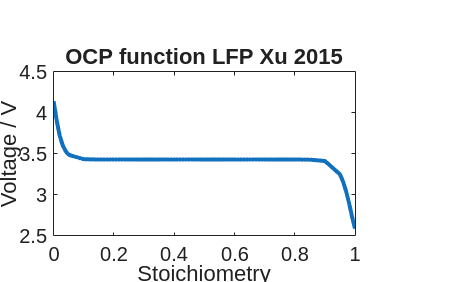

In [6]:
x = linspace(0, 1, 100);
y = fn(x);

figure
plot(x, y);
xlabel('Stoichiometry');
ylabel('Voltage / V');
title('OCP function LFP Xu 2015')


The interface is the same for a function defined with an other format. Let us load a function using a string format


In [7]:
jsonstruct = parseBattmoJson('ParameterData/ParameterSets/Chen2020/chen2020_positive_electrode_interface.json');


In this json structure, we have the description of a function for the OCP. In this case, we have a tabulated function


In [8]:
disp(jsonstruct.openCircuitPotential)

    functionFormat: 'string expression'
      argumentList: {'stoichiometry'}
       expressions: [2x1 struct]

In [9]:
disp(jsonstruct.openCircuitPotential.expressions(1))

         language: 'matlab'
    variableNames: {'sto'}
          formula: '-0.8090*sto + 4.4875 - 0.0428*tanh(18.5138*(sto - 0.5542)) - 17.7326*tanh(15.7890*(sto - 0.3117)) + 17.5842*tanh(15.9308*(sto - 0.3120))'

In [10]:
[fn, func] = setupFunction(jsonstruct.openCircuitPotential);
disp(func)

  FormulaFunction with properties:
                      formula: '-0.8090*sto + 4.4875 - 0.0428*tanh(18.5138*(sto - 0.5542)) - 17.7326*tanh(15.7890*(sto - 0.3117)) + 17.5842*tanh(15.9308*(sto - 0.3120))'
                variableNames: {'sto'}
                outputVarName: 'y'
    formattedStringExpression: 'sto = varargin{1}; y = -0.8090*sto + 4.4875 - 0.0428*tanh(18.5138*(sto - 0.5542)) - 17.7326*tanh(15.7890*(sto - 0.3117)) + 17.5842*tanh(15.9308*(sto - 0.3120));'
               functionFormat: 'string expression'
                 argumentList: {'stoichiometry'}
            numberOfArguments: 1



We can use the function handler to evaluate the function


In [11]:
fn(0.5)

ans = 3.9720



Note that the function handler is a short cut for the generic method `eval` of the parent class `Function`


In [12]:
func.eval(0.5)

ans = 3.9720



As previously, we can plot the function



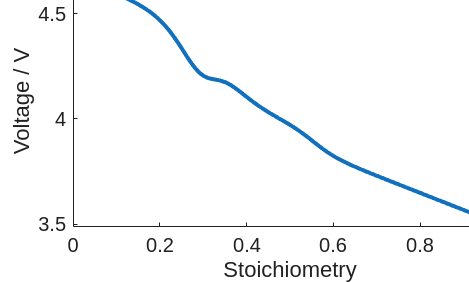

In [13]:
x = linspace(0, 1, 100);
y = fn(x);

figure
plot(x, y);
xlabel('Stoichiometry');
ylabel('Voltage / V');
title('OCP function NMC Chen 2020')